# Gaussian Mixture Models

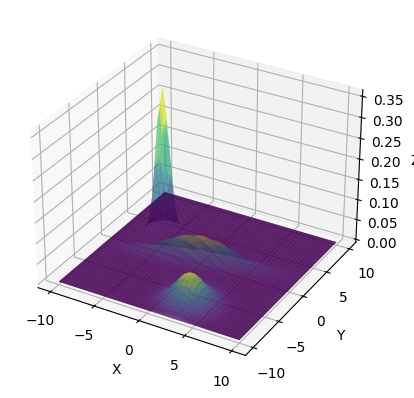

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Generate random data
np.random.seed(0)
n_samples = 300
C = np.array([[0., -0.7], [3.5, .7]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3]),
          1.5 * np.random.randn(n_samples, 2) + np.array([3, -7])]

# Fit a Gaussian Mixture Model with three components
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf.fit(X)

# Create a grid of points
x = np.linspace(-10, 10)
y = np.linspace(-10, 10)
X_grid, Y_grid = np.meshgrid(x, y)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each Gaussian in the mixture
for i in range(clf.n_components):
    mean = clf.means_[i]
    cov = clf.covariances_[i]

    # Create multivariate normal distribution
    rv = multivariate_normal(mean, cov)

    # Calculate Z values for grid
    Z = np.zeros(X_grid.shape)
    for j in range(X_grid.shape[0]):
        for k in range(X_grid.shape[1]):
            Z[j,k] = rv.pdf([X_grid[j,k], Y_grid[j,k]])
    
    # Plot the surface
    ax.plot_surface(X_grid, Y_grid, Z, cmap='viridis', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [3]:
import numpy as np
import plotly.graph_objects as go
from sklearn import mixture
from scipy.stats import multivariate_normal

# Generate random data
np.random.seed(0)
n_samples = 300
C = np.array([[0., -0.7], [3.5, .7]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3]),
          1.5 * np.random.randn(n_samples, 2) + np.array([3, -7])]

# Fit a Gaussian Mixture Model with three components
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf.fit(X)

# Create a grid of points
x = np.linspace(-10, 10)
y = np.linspace(-10, 10)
X_grid, Y_grid = np.meshgrid(x, y)

fig = go.Figure()

# Plot each Gaussian in the mixture
for i in range(clf.n_components):
    mean = clf.means_[i]
    cov = clf.covariances_[i]

    # Create multivariate normal distribution
    rv = multivariate_normal(mean, cov)

    # Calculate Z values for grid
    Z = np.zeros(X_grid.shape)
    for j in range(X_grid.shape[0]):
        for k in range(X_grid.shape[1]):
            Z[j,k] = rv.pdf([X_grid[j,k], Y_grid[j,k]])
    
    # Create surface trace and add to figure
    surface = go.Surface(x=X_grid, y=Y_grid, z=Z)
    fig.add_trace(surface)

fig.update_layout(scene = dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'))
fig.show()

In [4]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generate some sample data
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

# Create a Gaussian Mixture Model
gmm = GaussianMixture(n_components=4,  random_state=42)

# Fit the model to the data
gmm.fit(X)

# Predict the clustering labels for the dataset
labels = gmm.predict(X)

# Print the first 10 predicted labels
print(labels[:10])

[3 0 0 3 0 1 2 3 0 2]
